In [1]:
import os
import sys

def set_root_path():
    if os.getcwd().endswith('figures'):
        os.chdir('../')
set_root_path()
sys.path.append('python/')
sys.path = [p for p in sys.path if "unbiased-inverse-volume-rendering" not in p]
print(os.getcwd())
print(sys.executable)
os.environ.pop("PYTHONPATH")

C:\Users\mayuf\source\repos\practical-inverse-rendering-of-textured-and-translucent-appearance
C:\Users\mayuf\anaconda3\envs\practical-inverse-rendering\python.exe


'C:\\Users\\mayuf\\source\\repos\\unbiased-inverse-volume-rendering\\mitsuba3\\build\\Release\\python'

In [2]:
from pathlib import Path
import mitsuba as mi

mi.set_variant('cuda_ad_rgb')

from practical_reconstruction import optimization_cli
from core import integrators
from core import bsdfs
from core import textures
from core import emitters

integrators.register()
bsdfs.register()
textures.register()
emitters.register()

******** Running naive with base learning rate 0.1 ********
Next result location: results/leather_bag/naive_lr_0_1
Preparing Mitsuba scene for optimization
SceneParameters[
  -----------------------------------------------------------------------------------------------------------------------
  Name                                                                Flags    Type              Parent
  -----------------------------------------------------------------------------------------------------------------------
  Camera.near_clip                                                             float             PerspectiveCamera
  Camera.far_clip                                                              float             PerspectiveCamera
  Camera.shutter_open                                                          float             PerspectiveCamera
  Camera.shutter_open_time                                                     float             PerspectiveCamera
  Camera.film.size 

Loading references for sensor CameraClose: 100%|██████████| 4/4 [00:00<00:00, 52.36it/s]


Preparing optimization variables
Optimizing mat-leather's normalmap from default value : [[0.5, 0.5, 1]]
Learning rate for (texture) mat-leather (normalmap) is  0.010000000000000002
Starting optimization


Rendering at resolution level 0 (width=1024): 100%|██████████| 128/128 [06:29<00:00,  3.04s/it]


Re-rendering final frame with 32 spp
Saving optimized textures
Saving optimized videos
Saving loss data
--------- Done! ----------
******** Running mipmap_pyramid with base learning rate 0.01 ********
Next result location: results/leather_bag/mipmap_pyramid_lr_0_01
Preparing Mitsuba scene for optimization
Skipping already existing mitsuba scene: tmp\leather_bag\mts_scene
SceneParameters[
  -----------------------------------------------------------------------------------------------------------------------
  Name                                                                Flags    Type           Parent
  -----------------------------------------------------------------------------------------------------------------------
  Camera.near_clip                                                             float          PerspectiveCamera
  Camera.far_clip                                                              float          PerspectiveCamera
  Camera.shutter_open                   

Loading references for sensor CameraClose: 100%|██████████| 4/4 [00:00<00:00, 55.50it/s]


Preparing optimization variables
Optimizing mat-leather's normalmap from default value : [[0.5, 0.5, 1]]
Learning rate for (texture) mat-leather (normalmap) is  0.001
Starting optimization
Resizing initial value for mat-leather.normalmap.data/mat-leather.normalmap.data to shape: (4096, 4096, 3)
Skipping resizing as target shape is already reached.


Rendering at resolution level 0 (width=1024): 100%|██████████| 128/128 [06:29<00:00,  3.04s/it]


Re-rendering final frame with 32 spp
Saving optimized textures
Saving optimized videos
Saving loss data
--------- Done! ----------
******** Running large_steps with base learning rate 0.1 ********
Next result location: results/leather_bag/large_steps_lr_0_1_lambda_1_0
Preparing Mitsuba scene for optimization
Skipping already existing mitsuba scene: tmp\leather_bag\mts_scene
SceneParameters[
  -----------------------------------------------------------------------------------------------------------------------
  Name                                                                Flags    Type              Parent
  -----------------------------------------------------------------------------------------------------------------------
  Camera.near_clip                                                             float             PerspectiveCamera
  Camera.far_clip                                                              float             PerspectiveCamera
  Camera.shutter_open       

Loading references for sensor CameraClose: 100%|██████████| 4/4 [00:00<00:00, 67.73it/s]


Preparing optimization variables
Optimizing mat-leather's normalmap from default value : [[0.5, 0.5, 1]]
Learning rate for (texture) mat-leather (normalmap) is  0.010000000000000002
Starting optimization
Creating Conjugate Gradient Solver


Rendering at resolution level 0 (width=1024): 100%|██████████| 128/128 [6:37:46<00:00, 186.46s/it]   


Re-rendering final frame with 32 spp
Saving optimized textures
Saving optimized videos
Saving loss data
--------- Done! ----------
******** Running gradient_filtering with base learning rate 0.1 ********
Next result location: results/leather_bag/gradient_filtering_lr_0_1_sigma_d_0_001_F4
Preparing Mitsuba scene for optimization
Skipping already existing mitsuba scene: tmp\leather_bag\mts_scene
SceneParameters[
  -----------------------------------------------------------------------------------------------------------------------
  Name                                                                Flags    Type              Parent
  -----------------------------------------------------------------------------------------------------------------------
  Camera.near_clip                                                             float             PerspectiveCamera
  Camera.far_clip                                                              float             PerspectiveCamera
  Camera

Loading references for sensor CameraClose: 100%|██████████| 4/4 [00:00<00:00, 66.89it/s]


Preparing optimization variables
Optimizing mat-leather's normalmap from default value : [[0.5, 0.5, 1]]
Learning rate for (texture) mat-leather (normalmap) is  0.010000000000000002
Starting optimization


Rendering at resolution level 0 (width=1024): 100%|██████████| 128/128 [3:02:00<00:00, 85.31s/it] 


Re-rendering final frame with 32 spp
Saving optimized textures
Saving optimized videos
Saving loss data
--------- Done! ----------


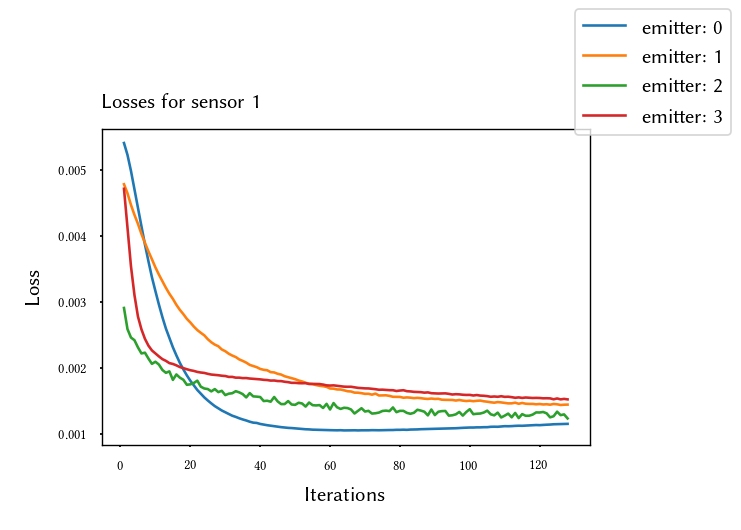

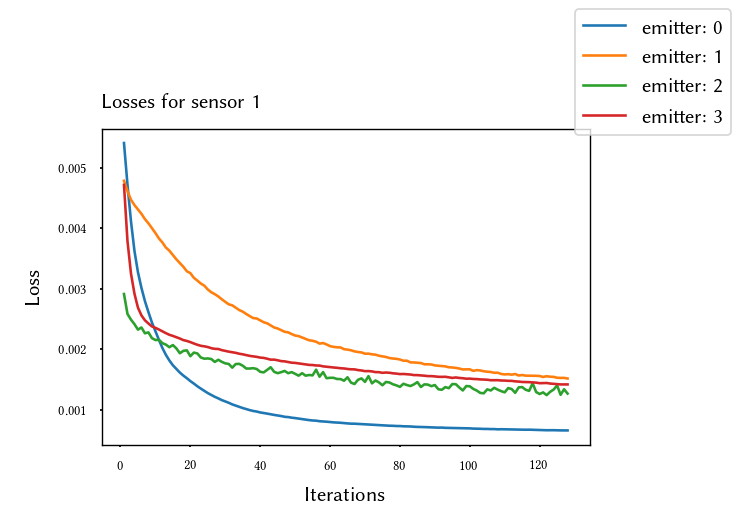

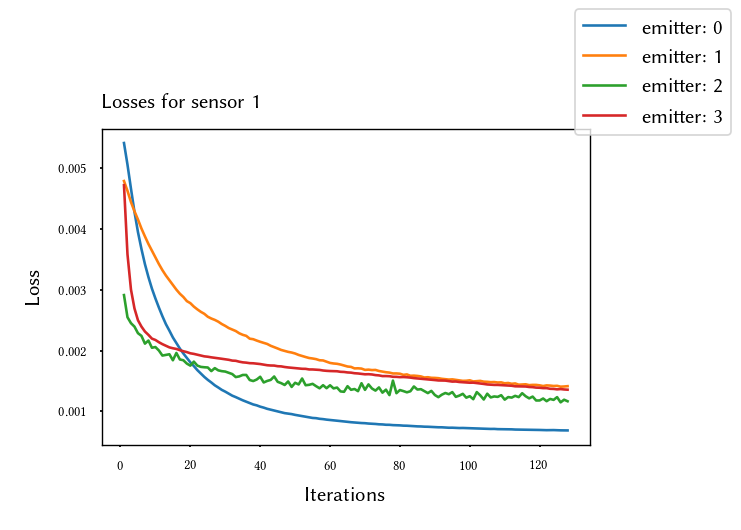

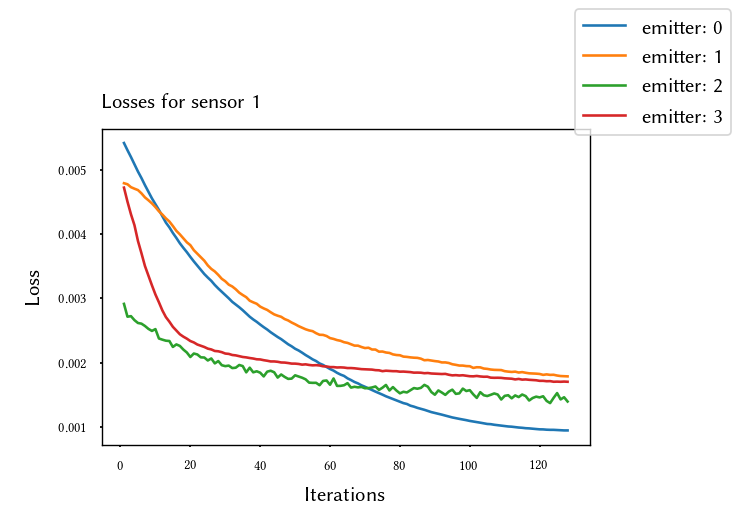

In [3]:
def format_float(f):
  """Formats a float such that 0.1 becomes "0_1", 10.0 becomes "10_0", etc."""
  return str(f).replace('.', '_')

scene_name = 'leather_bag'
techniques = ['naive', 'mipmap_pyramid', 'large_steps','gradient_filtering']

skip_existing = True

technique_configs = {
    'naive': [{'lr': 0.1}],
    'mipmap_pyramid': [{'lr': 0.01}],
    'large_steps': [{'lr': 0.1,'lambda':1.0}],
    'gradient_filtering': [{'lr': 0.1,'sigma_d':0.001}],
}

for technique in techniques:
    technique_params = technique_configs[technique]
    use_gradient_filtering = technique == 'gradient_filtering'
    use_conjugate_gradient_large_steps = technique == 'large_steps'

    for technique_param in technique_params:
        base_learning_rate = technique_param['lr']
        if use_gradient_filtering:
            sigma_d = technique_param['sigma_d']
            # For gradient filtering, recomended by authors
            filtering_steps = 4
        else:
            # unused
            sigma_d = 0.0
            filtering_steps = 0
 

        print(
            f'******** Running {technique} with base learning rate'
            f' {base_learning_rate} ********'
        )

        override_bindings = []
        result_folder = f'results/{scene_name}/{technique}'

        result_folder += f'_lr_{format_float(base_learning_rate)}'
        override_bindings.append(
            f'SceneConfig.base_learning_rate={base_learning_rate}'
        )

        if technique == 'large_steps':
            lambda_ = technique_param['lambda']
            result_folder += f'_lambda_{format_float(lambda_)}'
            override_bindings.append(
                f'SceneConfig.large_steps_lambda={lambda_}'
            )

        # Ensure that the default tmp folder is used
        override_bindings.append("SceneConfig.tmp_folder=''")
        override_bindings.append(
            f'SceneConfig.use_conjugate_gradient_large_steps={use_conjugate_gradient_large_steps}'
        )
        override_bindings.append(
            f'SceneConfig.use_gradient_filtering={use_gradient_filtering}'
        )

        if use_gradient_filtering:
            result_folder += f'_sigma_d_{format_float(sigma_d)}'
            result_folder += f'_F{filtering_steps}'
            override_bindings.append(
                f'SceneConfig.filtering_sigma_d={sigma_d}'
            )
            override_bindings.append(
                f'SceneConfig.a_trous_filtering_steps={filtering_steps}'
            )
            override_bindings.append(
                f'SceneConfig.log_domain_filtering={True}'
            )

        override_bindings.append(
            f"SceneConfig.result_folder='{result_folder}'"
        )

        if technique == 'gradient_filtering':
            gin_config_name = f'{scene_name}/naive'
        else:
            gin_config_name = f'{scene_name}/{technique}'

        print(f'Next result location: {result_folder}')
        if skip_existing and Path(result_folder).exists():
            print('Skipping, already present')
            continue

        # Run the config
        optimization_cli.run_config(gin_config_name, override_bindings)

## Figure starts here

In [ ]:
from core import image_util
from core import mitsuba_io

from practical_reconstruction import figutils

import drjit as dr
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import gridspec

In [ ]:
FIGURE_DIR = "figures/pdfs"
FIGURE_NAME = "leather_bag"

def l2_error(ref,img):
  return dr.mean(dr.square(ref-img)).array[0]

def load_images_and_errors(scene_name, scene_name_ref):
  start_iter = 31
  end_iter = 127
  images = []
  
  emitter_idx = 0
  ref_view_name = "ref_view_001"

  for iter in [start_iter, end_iter]:
    suffix = f"CameraClose_iter_{iter:03d}_{emitter_idx:03d}"

    images.append([
      f"results/{scene_name}/naive_lr_0_1/frames/{suffix}.exr",
      f"results/{scene_name}/large_steps_lr_0_1_lambda_1_0/frames/{suffix}.exr",
      f"results/{scene_name}/gradient_filtering_lr_0_1_sigma_d_0_001_F4/frames/{suffix}.exr",
      f"results/{scene_name}/mipmap_pyramid_lr_0_01/frames/{suffix}.exr",
      f"third_party/{scene_name_ref}/references/{ref_view_name}_emitter_{emitter_idx:03d}.exr",
    ])

  image_exr_paths_iter_start, image_exr_paths_iter_end = images
  num_images = len(image_exr_paths_iter_end)
  assert num_images == len(image_exr_paths_iter_start)
  images_exr_start, images_exr_end = [], []
  images_start, images_end = [], []
  for col in range(num_images):
    exr_start = mitsuba_io.read_bitmap(image_exr_paths_iter_start[col])
    exr_end = mitsuba_io.read_bitmap(image_exr_paths_iter_end[col])
    tonemapped_start = image_util.tonemap(exr_start).convert(
        pixel_format=mi.Bitmap.PixelFormat.RGB,
        component_format=mi.Struct.Type.Float32,
    )
    tonemapped_end = image_util.tonemap(exr_end).convert(
        pixel_format=mi.Bitmap.PixelFormat.RGB,
        component_format=mi.Struct.Type.Float32,
    )
    images_exr_start.append(mi.TensorXf(exr_start))
    images_exr_end.append(mi.TensorXf(exr_end))
    images_start.append(np.array(tonemapped_start))
    images_end.append(np.array(tonemapped_end))

  error_fn = l2_error
  errors_start, errors_end = [], []
  ref_end = images_exr_end[-1]
  ref_start = images_exr_start[-1]
  for col in range(num_images - 1):
    # End
    img = images_exr_end[col]
    error = error_fn(ref_end, img)
    errors_end.append(error)
    # Start
    img = images_exr_start[col]
    if ref_start.shape != img.shape:
      error = error_fn(image_util.resize_to_width(ref_start, img.shape[1]), img)
    else:
      error = error_fn(ref_start, img)
    errors_start.append(error)

  flip_errors = [figutils.flip_error(img_end, images_end[-1]) for img_end in images_end]

  return (
      images_start,
      images_end,
      errors_start,
      errors_end,
      flip_errors,
      start_iter,
      end_iter,
  )

In [ ]:
def figure_grid_setup(image_shape,image_crop_shape,inner_space=0.0,outer_space=0.1):
  # Image aspect ratios
  h, w = image_shape
  h_crop, w_crop = image_crop_shape
  
  # Spacing in the inner gridspec
  bottom_inner_wspace = inner_space
  # same vertical spacing as horizontal spacing
  bottom_inner_hspace = bottom_inner_wspace * figutils.gridspec_aspect(
      n_rows=1, n_cols=1, w=[w, w], h=[h, h_crop]
  )
  bottom_inner_rows = 2
  bottom_inner_cols = 5
  bottom_height_ratios = [h, h_crop]
  bottom_inner_aspect = figutils.gridspec_aspect(
      n_rows=bottom_inner_rows,
      n_cols=bottom_inner_cols,
      w=[w] * bottom_inner_cols,
      h=bottom_height_ratios,
      wspace=bottom_inner_wspace,
      hspace=bottom_inner_hspace,
  )

  # Spacing in the main griddpec
  outer_rows = 1
  outer_cols = 1
  outer_wspace = 0.0
  outer_hspace = outer_space
  
  outer_aspect = figutils.gridspec_aspect(
      n_rows=outer_rows,
      n_cols=outer_cols,
      w=1,
      h=[1 / bottom_inner_aspect],
      wspace=outer_wspace,
      hspace=outer_hspace,
  )
  
  fig = plt.figure(
      1, figsize=(figutils.TEXT_WIDTH, figutils.TEXT_WIDTH / outer_aspect)
  )

  outer_gs = fig.add_gridspec(
      outer_rows,
      outer_cols,
      hspace=outer_hspace,
      wspace=outer_wspace,
      height_ratios=[1 / bottom_inner_aspect],
      width_ratios=[1],
  )

  bottom_inner_gs = gridspec.GridSpecFromSubplotSpec(
      bottom_inner_rows,
      bottom_inner_cols,
      subplot_spec=outer_gs[0],
      wspace=bottom_inner_wspace,
      hspace=bottom_inner_hspace,
      width_ratios=[h] * bottom_inner_cols,
      height_ratios=bottom_height_ratios,
  )
  return (
      fig,
      ([bottom_inner_gs], bottom_inner_rows, bottom_inner_cols),
  )

In [ ]:
# Load the images for the respective inner grids, compute crops and FLIP errors
(
    images_leather_bag_start,
    images_leather_bag_end,
    errors_leather_bag_start,
    errors_leather_bag_end,
    flip_errors_leather_bag,
    start_iter_leather_bag,
    end_iter_leather_bag,
) = load_images_and_errors(
    "leather_bag", "leather_bag"
)

leather_bag_crop_size = (500, 350)
leather_bag_crop_offset = (290, 300)

# Precompute crops
images_leather_bag_crops = [
    figutils.crop_image(img, leather_bag_crop_offset, leather_bag_crop_size)
    for img in images_leather_bag_end
]
images_leather_bag_crops_flip = [
    figutils.crop_image(img, leather_bag_crop_offset, leather_bag_crop_size)
    for img in flip_errors_leather_bag
]

In [ ]:
import matplotlib
import matplotlib.patheffects as pe

matplotlib.rcParams.update(
    {'axes.labelsize': 7}
)

# Generate the grid structure for the figure
(
    fig,
    (bottom_inner_gs, bottom_inner_rows, bottom_inner_cols),
) = figure_grid_setup(
    image_shape=[1024, 1024],
    image_crop_shape=[int(0.7*1024), 1024],
    inner_space=0.02,
    # outer_space=0.053,
    outer_space=0.07,
)


def error_format(error, scale):
  return f"{error*scale:.3f}"


def add_iter_texts(ax, img_shape, linewidth=0.75):
  ax.text(
      20,
      20,
      f"Iter. 32",
      color="white",
      ha="left",
      va="top",
      fontsize=8,
      path_effects=[pe.withStroke(linewidth=linewidth, foreground="black")],
  )
  ax.text(
      img_shape[1] - 20,
      img_shape[0] - 8,
      "Iter. 128",
      color="white",
      ha="right",
      va="bottom",
      fontsize=8,
      path_effects=[pe.withStroke(linewidth=linewidth, foreground="black")],
  )


line_width = 0.5

crop_color = "orange"
crop_1_color = "orange"
crop_2_color = "green"

titles = [
    "Standard Adam",
    figutils.LARGE_STEPS_NAME_SHORT,
    figutils.GRAD_FILTERING_NAME,
    "Ours",
    "Reference",
]

scale = 1000
scale_txt = figutils.math_label(r"\text{$\times 10^3$}",font_size=7)

# Main figure generation
# row 0 : image
# row 1 : split(crop 1 / flip)
ref_col = 4
ours_col = 3
filter_col = 2

for scene_idx, inner_gs in enumerate(bottom_inner_gs):
  for row in range(bottom_inner_rows):
    for col in range(bottom_inner_cols):
      
      scene_images_start = images_leather_bag_start
      scene_images_end = images_leather_bag_end
      scene_crop_images = images_leather_bag_crops
      errors_start = errors_leather_bag_start
      errors_end = errors_leather_bag_end
      flip_errors_crop = images_leather_bag_crops_flip
      scene_name = "Leather bag"
      crop_offset = leather_bag_crop_offset
      crop_size = leather_bag_crop_size
      boost =1.0

      # Main image
      if row == 0:
        ax = fig.add_subplot(inner_gs[row, col])
        figutils.disable_ticks(ax)
        if col == 0:
          ax.set_ylabel(r"\textsc{" + scene_name + "}", labelpad=1.5,fontsize=8)

        if col == ref_col:
          ax.imshow(boost*scene_images_end[col])
          # Rectangle Crops
          rect_closeup = Rectangle(
              crop_offset,
              crop_size[0],
              crop_size[1],
              linewidth=line_width,
              edgecolor=crop_color if row == 0 else "green",
              facecolor="none",
          )
          ax.add_patch(rect_closeup)
        else:
          img_combined, xline, yline = figutils.diagonal_split_image(
              scene_images_start[col],
              scene_images_end[col],
              offset=0,
              angle=20,
          )
          ax.plot(xline, yline, color="black", linewidth=line_width)
          ax.imshow(boost*img_combined, aspect="equal")
          add_iter_texts(ax, scene_images_end[col].shape)

      else:
        ax = fig.add_subplot(inner_gs[row, col])
        figutils.disable_ticks(ax)

        if col == 0:
          ax.set_ylabel("Iter. 128 / FLIP", labelpad=1.5,fontsize=8)

        if col == ref_col:
          ax.imshow(boost*scene_crop_images[col])
          label = r"$L_2$ " + scale_txt + " error (Iter. 32 / 128)"
        else:
          img_combined, xline, yline = figutils.diagonal_split_image(
              boost*scene_crop_images[col],
              flip_errors_crop[col],
              offset=0,
              angle=20,
          )
          ax.plot(xline, yline, color="black", linewidth=line_width)
          ax.imshow(img_combined, aspect="equal")
          if col == ours_col:
            label = (
                error_format(errors_start[col], scale)
                + " / "
                + r"\textbf{"
                + error_format(errors_end[col], scale)
                + r"}"
            )
          else:
            label = (
                error_format(errors_start[col], scale)
                + " / "
                + error_format(errors_end[col], scale)
            )
          # Add colored borders
        ax.spines[:].set_color(crop_color)
        ax.spines[:].set_linewidth(line_width)
        ax.set_xlabel(label, labelpad=1.5)

figutils.force_post_crop_size(fig, figutils.TEXT_WIDTH)

In [ ]:
figutils.savefig(
    fig,
    name=Path(FIGURE_NAME),
    fig_directory=Path(FIGURE_DIR),
    dpi=300,
    pad_inches=0.005,
    bbox_inches="tight",
    compress=False,
    target_width=figutils.TEXT_WIDTH,
    backend=None,
)